In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
# Read CSV file
electricity_data = r"../Project2/Resources/electricity_access_percent.csv"
gdp_data = r"../Project2/Resources/gdp_data.csv"

In [3]:
# Read electricity File and store into Pandas data frame
electricity_df = pd.read_csv(electricity_data)

In [4]:
# Display dataframe
electricity_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,93.086166,93.354546,93.356292,93.942375,94.255814,94.578262,94.906723,95.238182,95.570145,NaN
1,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,42.400000,44.854885,42.700000,43.222019,69.100000,67.259552,89.500000,71.500000,84.137138,NaN
2,Angola,AGO,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,31.268013,32.382469,33.514950,34.600000,35.821964,36.990490,32.000000,42.000000,40.520607,NaN
3,Albania,ALB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN
4,Andorra,AND,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN


In [5]:
# Drop columns
electricity_df.drop(electricity_df.iloc[:, 2:34], inplace = True, axis = 1)

In [6]:
electricity_df.drop('2017', axis=1, inplace=True)

In [7]:
# Display Dataframe
electricity_df.head()

,Country Name,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,88.445351,88.780846,89.115829,89.447754,89.773560,90.090187,90.394585,90.683678,...,92.838821,93.086166,93.354546,93.356292,93.942375,94.255814,94.578262,94.906723,95.238182,95.570145
1,Afghanistan,AFG,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,...,33.748680,42.400000,44.854885,42.700000,43.222019,69.100000,67.259552,89.500000,71.500000,84.137138
2,Angola,AGO,11.397808,12.579379,13.760440,14.938441,16.110325,17.273031,18.423502,19.558676,...,37.500000,31.268013,32.382469,33.514950,34.600000,35.821964,36.990490,32.000000,42.000000,40.520607
3,Albania,ALB,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
4,Andorra,AND,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [8]:
# Read gdp File and store into Pandas data frame
gdp_df = pd.read_csv(gdp_data)

In [9]:
gdp_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.791961e+09,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,537777811.1,548888895.6,546666677.8,751111191.1,800000044.4,1.006667e+09,...,1.019053e+10,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.026425e+10,2.061610e+10,1.921556e+10,1.946902e+10,2.081530e+10
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,8.417804e+10,7.549239e+10,8.252614e+10,1.040000e+11,1.140000e+11,1.250000e+11,1.270000e+11,1.030000e+11,9.533720e+10,1.240000e+11
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.288135e+10,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.138693e+10,1.188368e+10,1.303935e+10
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.007353e+09,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.877312e+09,3.012914e+09


In [10]:
# Drop columns
gdp_df.drop(gdp_df.iloc[:, 2:34], inplace = True, axis = 1)

In [11]:
gdp_df.drop('2017', axis=1, inplace=True)

In [12]:
gdp_df.head()

,Country Name,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,NaN,NaN,NaN,NaN,1.330168e+09,1.320670e+09,1.379888e+09,1.531844e+09,...,2.623726e+09,2.791961e+09,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.843842e+09,1.019053e+10,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.026425e+10,2.061610e+10,1.921556e+10,1.946902e+10
2,Angola,AGO,1.123628e+10,NaN,NaN,NaN,3.390500e+09,5.561222e+09,6.537504e+09,7.676534e+09,...,6.044892e+10,8.417804e+10,7.549239e+10,8.252614e+10,1.040000e+11,1.140000e+11,1.250000e+11,1.270000e+11,1.030000e+11,9.533720e+10
3,Albania,ALB,2.101625e+09,1.139167e+09,7.094526e+08,1.228071e+09,1.985674e+09,2.424499e+09,3.314898e+09,2.359903e+09,...,1.070101e+10,1.288135e+10,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.138693e+10,1.188368e+10
4,Andorra,AND,1.029048e+09,1.106929e+09,1.210014e+09,1.007026e+09,1.017549e+09,1.178739e+09,1.223945e+09,1.180597e+09,...,4.016972e+09,4.007353e+09,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.877312e+09


In [13]:
elec_melt_df = electricity_df.melt(id_vars = ["Country Name", "Country Code"], value_vars = ["1990","1991","1992","1993","1994","1995",\
"1996","1997","1998","1999","2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012",\
"2013","2014","2015","2016"], var_name = "Year", value_name = "Electricity_Percent_Access")

In [14]:
elec_melt_df.head()

,Country Name,Country Code,Year,Electricity_Percent_Access
0,Aruba,ABW,1990,88.445351
1,Afghanistan,AFG,1990,0.010000
2,Angola,AGO,1990,11.397808
3,Albania,ALB,1990,100.000000
4,Andorra,AND,1990,100.000000


In [15]:
gdp_melt_df = gdp_df.melt(id_vars = ["Country Name", "Country Code"], value_vars = ["1990","1991","1992","1993","1994","1995",\
"1996","1997","1998","1999","2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012",\
"2013","2014","2015","2016"], var_name = "Year", value_name = "GDP")

In [16]:
gdp_melt_df.head()

,Country Name,Country Code,Year,GDP
0,Aruba,ABW,1990,NaN
1,Afghanistan,AFG,1990,NaN
2,Angola,AGO,1990,1.123628e+10
3,Albania,ALB,1990,2.101625e+09
4,Andorra,AND,1990,1.029048e+09


In [17]:
# Grouping electriicty access percent by year
yearly_data = elec_melt_df.groupby(['Year']).mean()
yearly_data

,Electricity_Percent_Access
Year,
1990,66.482942
1991,66.985435
1992,67.674832
1993,68.217255
1994,68.836069
1995,69.785224
1996,70.668421
1997,71.201220
1998,71.902444


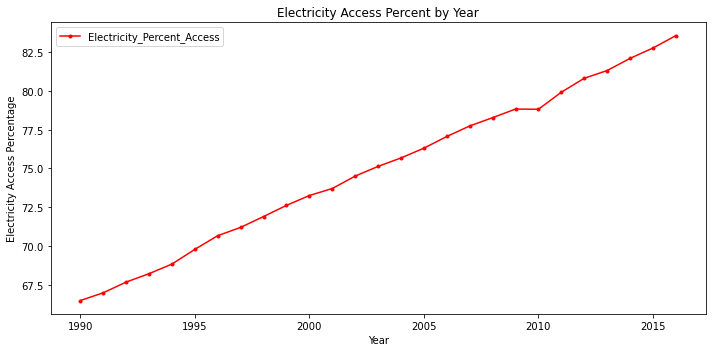

In [18]:
# Plot electricity access percent by year
elec_groupby_df = pd.DataFrame(data=yearly_data)

elec_groupby_df.plot.line(title="Electricity Access Percent by Year", color = 'r', figsize=(10, 5), style='.-')
plt.xlabel('Year')
plt.ylabel('Electricity Access Percentage')
plt.tight_layout()
plt.show()

In [19]:
# Grouping electriicty access percent by country name
country_data = elec_melt_df.groupby(['Country Name']).mean()
country_data

,Electricity_Percent_Access
Country Name,
Afghanistan,25.071277
Albania,100.000000
Algeria,98.873460
American Samoa,NaN
Andorra,100.000000
...,...
West Bank and Gaza,99.023972
World,79.245505
"Yemen, Rep.",53.835020


In [20]:
bottom10 = country_data.nsmallest(n=10, columns=['Electricity_Percent_Access'])
bottom10

,Electricity_Percent_Access
Country Name,
South Sudan,1.663621
Liberia,2.880699
Chad,3.894944
Burundi,3.961662
Malawi,5.881649
Central African Republic,6.924138
Guinea-Bissau,6.979996
Rwanda,8.060362
"Congo, Dem. Rep.",8.448126


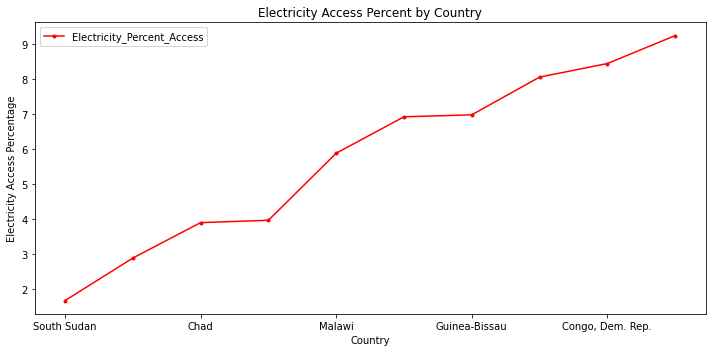

In [21]:
# Plot electricity access percent by year
elec_bottom_df = pd.DataFrame(data=bottom10)

elec_bottom_df.plot.line(color = 'r', figsize=(10, 5), style='.-')
plt.title("Electricity Access Percent by Country") 
plt.xlabel('Country')
plt.ylabel('Electricity Access Percentage')
plt.tight_layout()
plt.show()

In [25]:
elec_melt_df.to_csv(r"../Project2/Output/electricity_final.csv", index=False, header=True)

In [26]:
gdp_melt_df.to_csv(r"../Project2/Output/gdp_final.csv", index=False, header=True)